<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 3 is all about exploring this data and modeling interesting relationships with regression.

Project 3 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

## Dataset

The dataset I analyze here is from SF311. The data includes historical 311 requests data, from opened and closed date, request type and detail, to geological data. The original data could be found through the link: https://data.sfgov.org/City-Management-and-Ethics/Street-and-Sidewalk-Cleaning/h3eg-w3pj

In [2]:
clean_df = pd.read_csv('Street_and_Sidewalk_Cleaning.csv')

print clean_df.shape
print clean_df.columns
clean_df.head()

(666130, 14)
Index([u'﻿CaseID', u'Opened', u'Closed', u'Status', u'Responsible Agency',
       u'Address', u'Category', u'Request Type', u'Request Details', u'Source',
       u'Supervisor District', u'Neighborhood', u'Updated', u'Point'],
      dtype='object')


,﻿CaseID,Opened,Closed,Status,Responsible Agency,Address,Category,Request Type,Request Details,Source,Supervisor District,Neighborhood,Updated,Point
0,322566,11/30/2008 10:56:00 PM,07/21/2009 04:24:00 PM,Closed,DPW Ops Queue,"1566 HYDE ST, SAN FRANCISCO, CA, 94109",Street and Sidewalk Cleaning,Sidewalk_Cleaning,Garbage,Voice In,3,Nob Hill,07/21/2009 04:24:00 PM,"(37.795328529, -122.418067787)"
1,322560,11/30/2008 10:24:00 PM,07/21/2009 04:24:00 PM,Closed,DPW Ops Queue,Intersection of TAYLOR ST and TURK ST,Street and Sidewalk Cleaning,Illegal_Dumping,Garbage,Voice In,6,Downtown/Civic Center,07/21/2009 04:24:00 PM,"(37.7832142923006, -122.410764953722)"
2,322559,11/30/2008 10:20:00 PM,12/01/2008 06:07:00 AM,Closed,DPW Ops Queue,"1601 SACRAMENTO ST, SAN FRANCISCO, CA, 94109",Street and Sidewalk Cleaning,Illegal_Dumping,Mattress,Voice In,3,Nob Hill,12/01/2008 06:07:00 AM,"(37.791643509125, -122.419260423291)"
3,322556,11/30/2008 09:34:00 PM,12/09/2008 08:07:00 AM,Closed,DPW Ops Queue,Intersection of 25TH ST and LUCKY ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Human_waste_or_urine,Voice In,9,Mission,12/09/2008 08:07:00 AM,"(37.7509362479361, -122.413364630104)"
4,322545,11/30/2008 08:45:00 PM,02/03/2009 07:09:00 AM,Closed,DPW Ops Queue,Intersection of 19TH ST and OAKWOOD ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Empty_cart,Voice In,8,Mission,02/03/2009 07:09:00 AM,"(37.7598935230725, -122.42486308879)"


In [3]:
# customized parser function
dateparse = lambda x: pd.datetime.strptime(str(x).lower(), '%m/%d/%Y %I:%M:%S %p')

# test the parser function
dateparse('07/21/2009 04:24:00 PM')

datetime.datetime(2009, 7, 21, 16, 24)

In [4]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666130 entries, 0 to 666129
Data columns (total 14 columns):
﻿CaseID                666130 non-null int64
Opened                 666130 non-null object
Closed                 650158 non-null object
Status                 666130 non-null object
Responsible Agency     666130 non-null object
Address                666120 non-null object
Category               666130 non-null object
Request Type           666061 non-null object
Request Details        666054 non-null object
Source                 666128 non-null object
Supervisor District    666130 non-null int64
Neighborhood           647837 non-null object
Updated                666130 non-null object
Point                  663724 non-null object
dtypes: int64(2), object(12)
memory usage: 71.2+ MB


In [5]:
# formatting data

clean_df = clean_df[clean_df['Status'] == 'Closed'].dropna(subset=['Neighborhood']).copy()

# drop some columns either we don't need or contain duplicated information
for col in ['CaseID','Status','Category','Updated','Address']:
    try:
        del clean_df[col]
    except:
        continue

clean_df['Opened'] = clean_df['Opened'].apply(dateparse)
clean_df['Closed'] = clean_df['Closed'].apply(dateparse)

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632219 entries, 0 to 666129
Data columns (total 10 columns):
﻿CaseID                632219 non-null int64
Opened                 632219 non-null datetime64[ns]
Closed                 632219 non-null datetime64[ns]
Responsible Agency     632219 non-null object
Request Type           632156 non-null object
Request Details        632149 non-null object
Source                 632219 non-null object
Supervisor District    632219 non-null int64
Neighborhood           632219 non-null object
Point                  632219 non-null object
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 53.1+ MB


In [6]:
clean_df['Day'] = clean_df['Opened'].apply(lambda d: d.dayofweek)

clean_df['Year'] = clean_df['Opened'].dt.year
clean_df['Month'] = clean_df['Opened'].dt.month
clean_df['Date'] = clean_df['Opened'].dt.day
clean_df['Hour'] = clean_df['Opened'].dt.hour

In [7]:
# data too large: choose recent 2 years: from 2014-10-01

clean_df = clean_df.loc[clean_df['Opened'] >= pd.datetime.strptime('2014-10-01','%Y-%m-%d')]
clean_df.shape

(258243, 15)

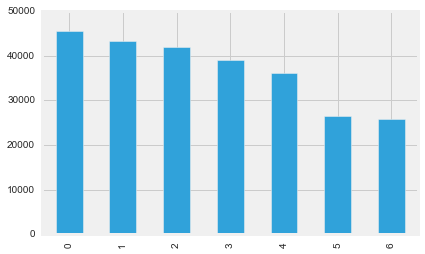

In [8]:
# 311 reporting day in the week (0: Monday, 6: Sunday)
# It's surprising that less Street and Sidewalk Cleaning reports in weekend

clean_df['Day'].value_counts().plot('bar')

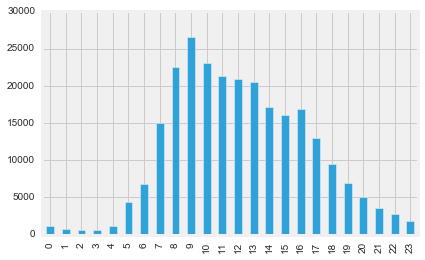

In [9]:
# reporting time in a day
# 9 am has been the peak; few reporting in midnight

clean_df['Hour'].value_counts().sort_index().plot('bar')

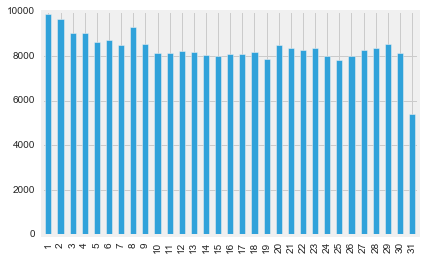

In [10]:
# ignoring that only some month has 31st, there are more 311 report in month begin in general

clean_df['Date'].value_counts().sort_index().plot('bar')

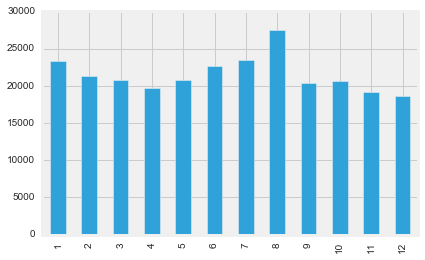

In [11]:
# for the past two years, summer (especially august) has more 311 reporting than the rest of seasons

clean_df['Month'].value_counts().sort_index().plot('bar')

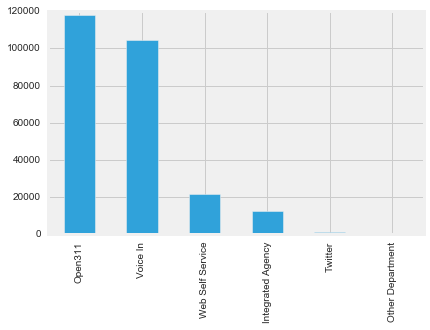

In [12]:
clean_df['Source'].value_counts().plot('bar')

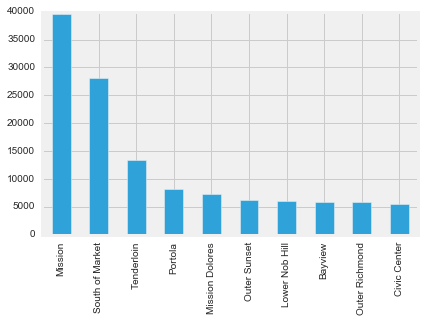

In [13]:
clean_df['Neighborhood'].value_counts().head(10).plot('bar')

In [14]:
clean_df['X_coordinate'] = clean_df['Point'].apply(lambda s: float(s[1:-1].split(', ')[0]))
clean_df['Y_coordinate'] = clean_df['Point'].apply(lambda s: float(s[1:-1].split(', ')[1]))

clean_df[['Neighborhood','Point','X_coordinate','Y_coordinate']].head()

,Neighborhood,Point,X_coordinate,Y_coordinate
22658,Telegraph Hill,"(37.8007864208215, -122.406407944011)",37.800786,-122.406408
22716,Outer Richmond,"(37.782079719154, -122.479641209333)",37.782080,-122.479641
23941,North Beach,"(37.7989693135443, -122.405645390632)",37.798969,-122.405645
24083,Showplace Square,"(37.7666953075207, -122.399677518455)",37.766695,-122.399678
25320,Mission Dolores,"(37.761341470692, -122.425520116127)",37.761341,-122.425520


In [15]:
# we want to predict the response time (from open to close, counted in days) for each 311 case

clean_df['response_time'] = (clean_df['Closed'] - clean_df['Opened']).apply(lambda dt: dt.total_seconds() / 86400)
clean_df['response_time'].head()

22658    0.124873
22716    1.308472
23941    0.022373
24083    5.286319
25320    0.299363
Name: response_time, dtype: float64

In [16]:
clean_df['log_response_time'] = np.log(clean_df['response_time'])

# drop -inf to avoid error
clean_df['log_response_time'].replace([np.inf, -np.inf], np.nan,inplace=True)
clean_df.dropna(subset=['response_time'],inplace=True)
clean_df.dropna(subset=['log_response_time'],inplace=True)

count    254104.000000
mean          2.646828
std          20.767693
min           0.000023
25%           0.078090
50%           0.250671
75%           0.802167
max         702.827002
Name: response_time, dtype: float64


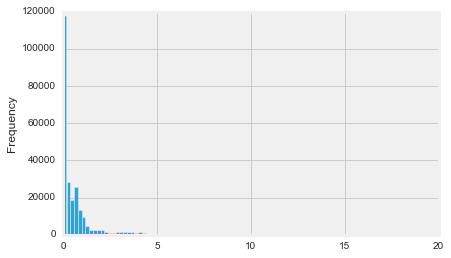

In [17]:
print clean_df['response_time'].describe()
clean_df[clean_df['response_time']<20]['response_time'].plot(kind = 'hist', bins = 100)

count    254104.000000
mean         -1.267413
std           1.692987
min         -10.673596
25%          -2.549890
50%          -1.383613
75%          -0.220438
max           6.555111
Name: log_response_time, dtype: float64


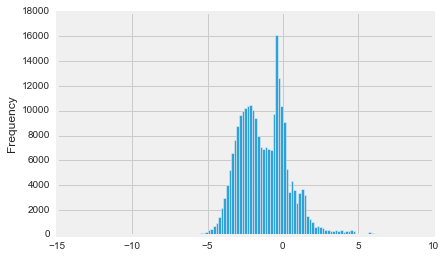

In [18]:
# after taking log, the log response time seem to be more normally distributed
# however, there are still two peaks in the distribution

print clean_df['log_response_time'].describe()
clean_df['log_response_time'].plot(kind = 'hist', bins = 100)

In [19]:
# look into the categorical variables

clean_df['Responsible Agency'].value_counts()

DPW Ops Queue                                        125296
Recology_Abandoned                                   111023
Recology_Overflowing                                   8190
Clear Channel - Transit Queue                          3010
311 Supervisor Queue                                   2822
PUC Sewer Ops                                           740
DPH - Environmental Health - G                          625
Recology_Litter                                         281
DPW - Bureau of Street Environmental Services - G       256
DPW BSM Queue                                           218
DPW BUF Queue                                           215
311 Service Request Queue - Hold                        184
Animal Care and Control - G                             150
Police - Homeless Concerns Queue                        113
RPD GGP Queue                                           100
RPD Park Service Area 1 Queue                            82
RPD Park Service Area 2 Queue           

In [20]:
clean_df['Request Type'].value_counts()

Bulky Items                                100670
General Cleaning                            78918
Hazardous Materials                         38636
Illegal Encampment                          23851
City_garbage_can_overflowing                 7114
Transit_shelter_platform                     1805
Overflowing_City_Receptacle_or_Dumpster      1376
Missed_Route_Mechanical_Sweeping              895
Automotive                                    785
Other Loose Garbage / Debris                    1
Sidewalk_Cleaning                               1
Garbage_and_Debris                              1
Name: Request Type, dtype: int64

In [21]:
clean_df['Source'].value_counts()

Open311              116851
Voice In             102038
Web Self Service      21326
Integrated Agency     12704
Twitter                1167
Other Department         18
Name: Source, dtype: int64

In [22]:
clean_df['Supervisor District'].value_counts()

9     51033
6     50585
3     29499
10    26352
8     24564
5     23022
1     13557
11    12316
2      9000
4      8146
7      5983
0        47
Name: Supervisor District, dtype: int64

In [23]:
clean_df['Neighborhood'].value_counts()

Mission                     38933
South of Market             27574
Tenderloin                  13006
Portola                      8045
Mission Dolores              7074
Outer Sunset                 6265
Lower Nob Hill               6006
Bayview                      5795
Outer Richmond               5791
Civic Center                 5343
Nob Hill                     5224
North Beach                  5145
Inner Richmond               5125
Potrero Hill                 4714
Chinatown                    4711
Bernal Heights               4604
Excelsior                    3548
Russian Hill                 3428
Castro                       3250
Lower Haight                 3242
Duboce Triangle              3092
Visitacion Valley            2854
Showplace Square             2741
Cathedral Hill               2490
Silver Terrace               2481
Haight Ashbury               2462
Hayes Valley                 2440
Downtown / Union Square      2324
Western Addition             2233
Mission Terrac

In [24]:
mk_dummy = ['Responsible Agency', 'Request Type', 'Source', 'Supervisor District', 'Neighborhood', 
            'Day', 'Year', 'Month', 'Date', 'Hour']

In [25]:
# dummifized these variable for later regression analysis

def mk_major_dummy(df, p=0.003):
    dum = pd.DataFrame()
    m = df.shape[0] * p
    
    for col in df.columns:
        
        counts = df[col].value_counts()
        major_types = counts[counts > m].index.tolist()        
        column_dummy = pd.get_dummies(df[col],dummy_na=True)

        print col
        
        # no 'other' type, drop a colummns directly
        if len(major_types) == column_dummy.shape[1]:
            main_dummy = column_dummy.ix[:,:-1]
            main_dummy.rename(columns = lambda s : col + '_' + s, inplace=True)
            
        # has 'other' type, 'NaN' will be considered as part of 'other'
        else:
            main_dummy = column_dummy.loc[:, major_types]
            main_dummy = pd.concat([main_dummy, 1 - main_dummy.sum(axis=1)], axis=1)
            main_dummy.rename(columns = lambda s : col + '_other' if s == 0 else col + '_' + str(s), inplace=True)

        dum = pd.concat([dum, main_dummy], axis=1)

    return dum

X_cat = mk_major_dummy(clean_df[mk_dummy])
X_cat.shape

Responsible Agency
Request Type
Source
Supervisor District
Neighborhood
Day
Year
Month
Date
Hour


(254104, 181)

In [26]:
X_cat.tail().T

,666116,666117,666118,666119,666122
Responsible Agency_DPW Ops Queue,1.0,1.0,1.0,1.0,0.0
Responsible Agency_Recology_Abandoned,0.0,0.0,0.0,0.0,0.0
Responsible Agency_Recology_Overflowing,0.0,0.0,0.0,0.0,0.0
Responsible Agency_Clear Channel - Transit Queue,0.0,0.0,0.0,0.0,0.0
Responsible Agency_311 Supervisor Queue,0.0,0.0,0.0,0.0,1.0
Responsible Agency_other,0.0,0.0,0.0,0.0,0.0
Request Type_Bulky Items,0.0,0.0,0.0,0.0,0.0
Request Type_General Cleaning,0.0,0.0,0.0,0.0,0.0
Request Type_Hazardous Materials,0.0,0.0,1.0,0.0,0.0
Request Type_Illegal Encampment,1.0,1.0,0.0,1.0,1.0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [27]:
# we use all dummy variables as predictors

X = X_cat.values
y = clean_df['log_response_time'].values

print X.shape, y.shape

(254104L, 181L) (254104L,)


In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import cross_val_score, KFold, train_test_split

In [30]:
cv_folds = KFold(len(y), n_folds=10)
Model = LinearRegression()
scores = []

for i, (train_ix, test_ix) in enumerate(cv_folds):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    Model.fit(X_train, y_train)
    score = Model.score(X_test, y_test)
    print 'Fold', i + 1, ':', score
    scores.append(score)
    
print 'Average Cross-Validation Score:', np.mean(scores)

Fold 1 : 0.387463934242
Fold 2 : 0.353569567014
Fold 3 : 0.34017964237
Fold 4 : 0.29986308061
Fold 5 : 0.321669647124
Fold 6 : 0.384587892963
Fold 7 : -0.676427061064
Fold 8 : 0.345995300294
Fold 9 : 0.367016886594
Fold 10 : 0.390643525138
Average Cross-Validation Score: 0.251456241528


In [31]:
Model.fit(X, y)
y_pred = Model.predict(X)

print Model.score(X, y)

0.378517015543


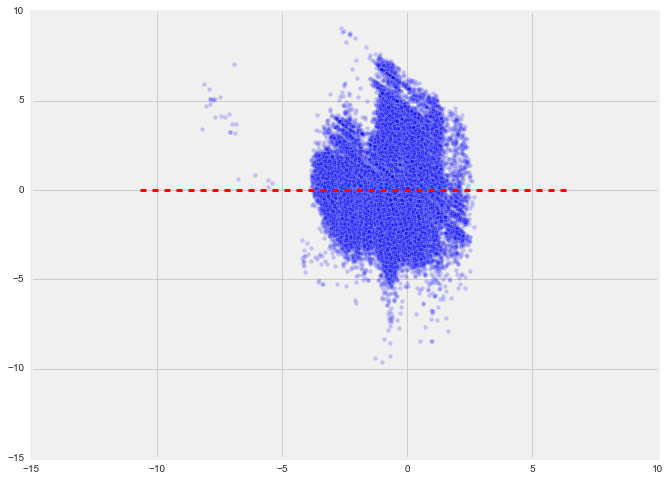

In [32]:
# prediciton residual v.s. 0's
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(y_pred, y - y_pred, alpha=0.2)
ax.plot(np.arange(np.min(y),np.max(y),(np.max(y)-np.min(y))/100), np.zeros(100),ls='--',c='r',lw=3)

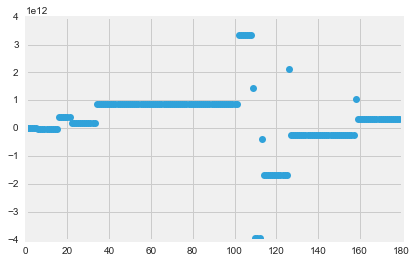

In [33]:
# visualizing the value of coefficients, 
# note that the absolute values of coefficients are too large since we havn't perform regularization

plt.plot(range(len(Model.coef_)), Model.coef_, ls='',marker='o')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [34]:
# the R^2 score for our linear regression model lies between 0.29-0.40
# except for the 7th fold cv: -0.67, which means for this particular CV, 
# the linear model predicts the exactly opposite trend

mean_squared_error(y, y_pred)

1.7812904247455121

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [35]:
from geopy.geocoders import Nominatim
from geopy.distance import vincenty

In [36]:
# get Recology location from http://www.recologysf.com/index.php/find-recology-sf

Recology = {
    'Sunset_Scavenger': (37.710967,-122.391635),
    'Golden_Gate': (37.769875, -122.400055),
    'San_Francisco': (37.708777,-122.400734),
    'Pier_96': (37.742387, -122.375592)
}

geolocator = Nominatim()

for key, val in Recology.items():
    location = geolocator.reverse(val)
    print key,':', location.address
    clean_df['D_to_' + key] = clean_df['Point'].apply(lambda c: vincenty((location.latitude, location.longitude), c).miles)
    
Recology_distance = clean_df.iloc[:,-4:]

Golden_Gate : Berry & 7th, Berry Street, Mission Creek, SF, California, 94107, United States of America
San_Francisco : The John A. Legnitto Environmental Learning Center, 401, Tunnel Avenue, SF, California, 94134, United States of America
Pier_96 : Amador Street, Bayview District, SF, California, 94124, United States of America
Sunset_Scavenger : 230, Executive Park Boulevard, SF, California, 94134, United States of America


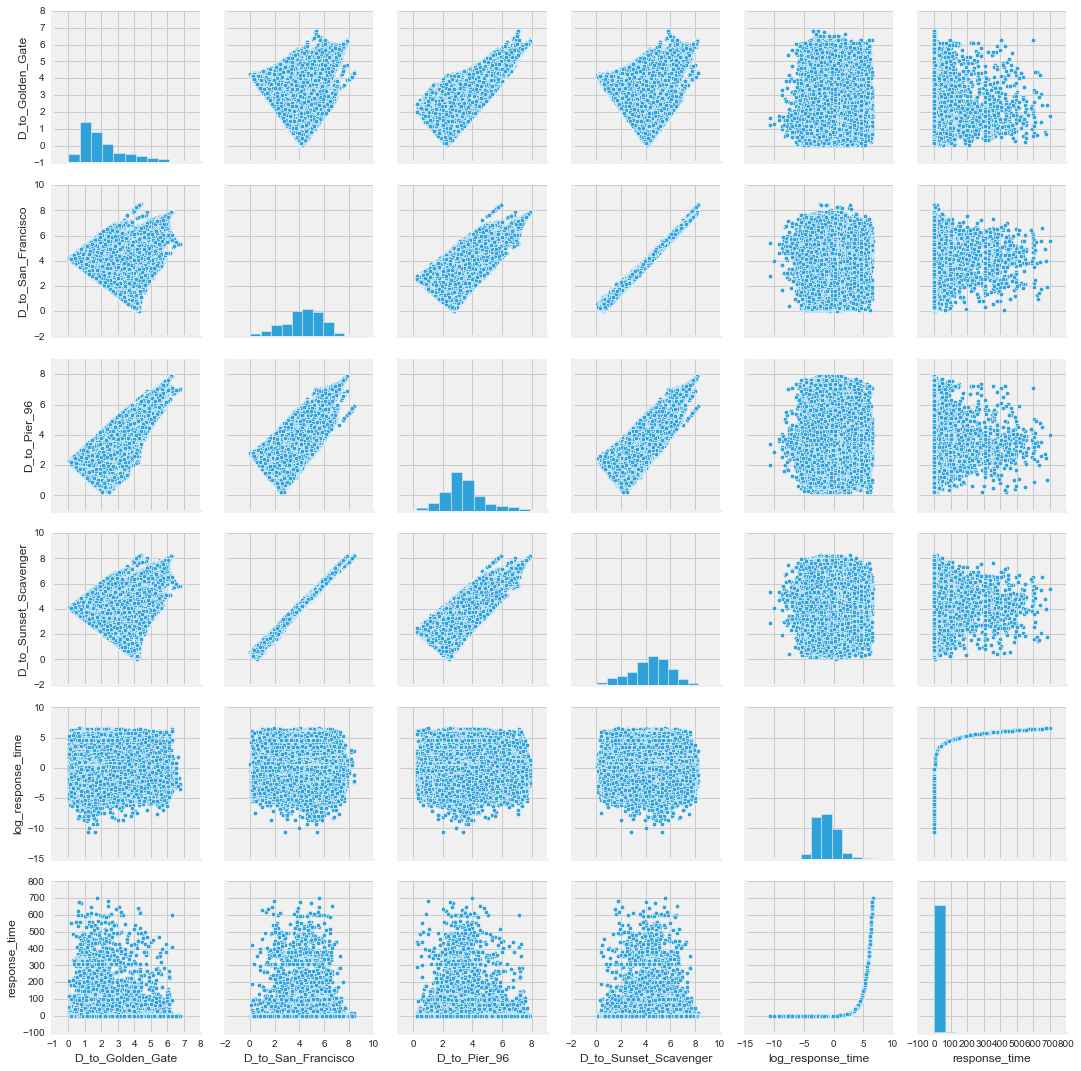

In [37]:
# pairplot for distance to each Recology spot and (log) respose time 

sns.pairplot(pd.concat([Recology_distance,clean_df[['log_response_time','response_time']]], axis=1))

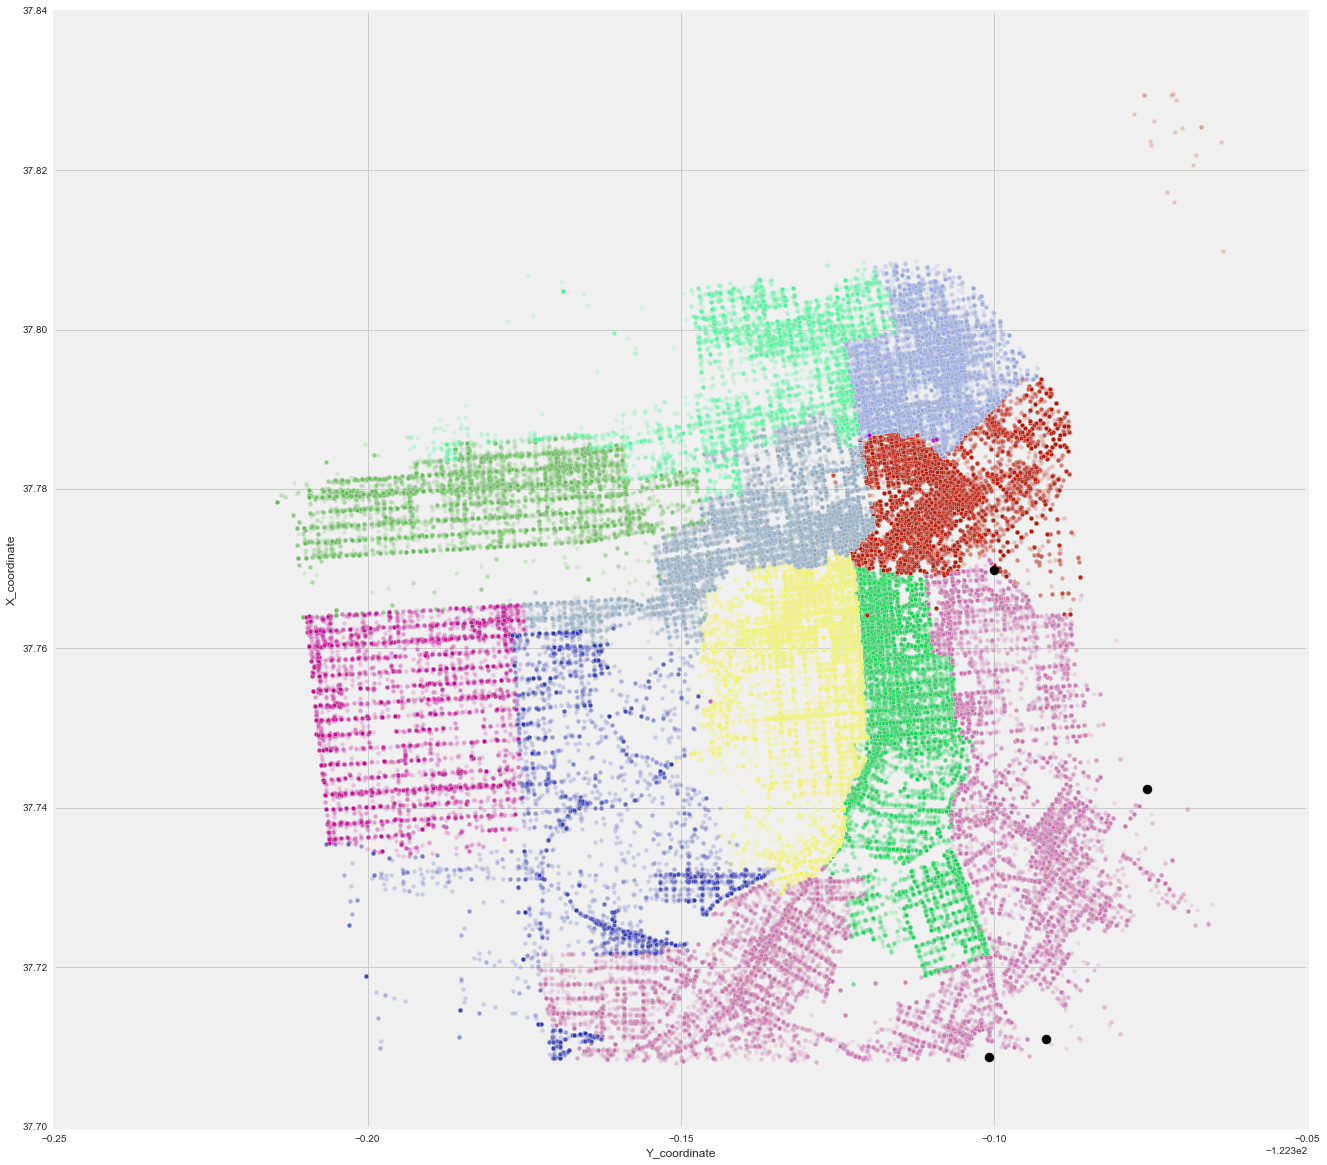

In [39]:
# visualizing neighborhood data

District = clean_df['Supervisor District'].value_counts().index.tolist()

ax =plt.gca()
for D in District:
    clean_df[clean_df['Supervisor District'] == D].plot('Y_coordinate', 'X_coordinate', kind='scatter', figsize=(20,20), 
                                                 alpha=0.2, c=np.random.rand(3,1), ax=ax)
plt.scatter([v[1] for v in Recology.values()], [v[0] for v in Recology.values()], 
            s=80, facecolors='k', edgecolors='k')

In [100]:
# as we can see the scatter plot, we only have 4 recology stations in the outer part of San Francisco
# intuitively, we can cross the District dummies with the distance to each recology stations

D_dummies = pd.get_dummies(clean_df['Supervisor District'])

cross_distance = pd.DataFrame()

for district in D_dummies.columns:
    for distance in Recology_distance.columns:        
        cross_distance[distance + '_' + str(district)] = Recology_distance[distance].values * D_dummies[district].values

cross_distance.tail()

,D_to_Golden_Gate_0,D_to_San_Francisco_0,D_to_Pier_96_0,D_to_Sunset_Scavenger_0,D_to_Golden_Gate_1,D_to_San_Francisco_1,D_to_Pier_96_1,D_to_Sunset_Scavenger_1,D_to_Golden_Gate_2,D_to_San_Francisco_2,...,D_to_Pier_96_9,D_to_Sunset_Scavenger_9,D_to_Golden_Gate_10,D_to_San_Francisco_10,D_to_Pier_96_10,D_to_Sunset_Scavenger_10,D_to_Golden_Gate_11,D_to_San_Francisco_11,D_to_Pier_96_11,D_to_Sunset_Scavenger_11
254099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.493392,3.759338,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
254100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
254101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.255103,2.976893,1.575154,2.915747,0.0,0.0,0.0,0.0
254102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
254103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.958557,4.270664,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [77]:
# we normalize X

X = np.hstack([X_cat.values, Recology_distance.values, cross_distance.values])
norm_X = (X - np.mean(X)) / np.std(X)

y = clean_df['log_response_time'].values

print norm_X.shape, y.shape

(254104L, 233L) (254104L,)


In [62]:
alphas = [1000, 100, 10, 1, 0.1, 0.01, 0.001]

In [80]:
# grid search for hyperparameter ALPHA under Ridge Regreesion Model

RidgeMd = RidgeCV(alphas=alphas, cv=10)
RidgeMd.fit(norm_X, y)

print 'ALPHA =', RidgeMd.alpha_
print ' - Average Cross-Validation Score:', RidgeMd.score(norm_X, y)

ALPHA = 1000
 - Average Cross-Validation Score: 0.376412666953


In [81]:
# grid search for hyperparameter ALPHA under Lasso Regreesion Model

LassoMd = LassoCV(alphas=alphas, cv=10)
LassoMd.fit(norm_X, y)

print 'ALPHA =', LassoMd.alpha_
print ' - Average Cross-Validation Score:', LassoMd.score(norm_X, y)

ALPHA = 0.01
 - Average Cross-Validation Score: 0.358118343341


In [84]:
# grid search for hyperparameter ALPHA & L1 Ratio under Elastic Net Regreesion Model

ENMd = ElasticNetCV(l1_ratio=[0.5, 0.7, 0.9, 0.95, 1], n_alphas=20, cv=10)
ENMd.fit(norm_X, y)

print 'ALPHA =', ENMd.alpha_
print 'L1 Ratio =', ENMd.l1_ratio_
print ' - Average Cross-Validation Score:', ENMd.score(norm_X, y)

ALPHA = 0.0100023728483
L1 Ratio = 1.0
 - Average Cross-Validation Score: 0.358112013146


0.358118343341


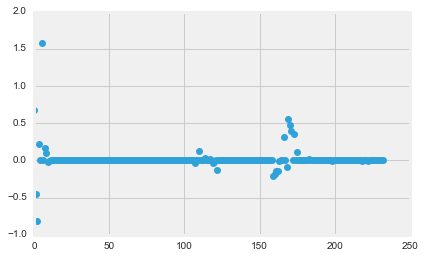

In [97]:
# all regularized regression methods boost the performance of linear regression
# the Lasso with alpha = 0.01 has best performance
# we visualize the coefficients

print LassoMd.score(norm_X, y)
plt.plot(range(len(LassoMd.coef_)), LassoMd.coef_, ls='',marker='o')

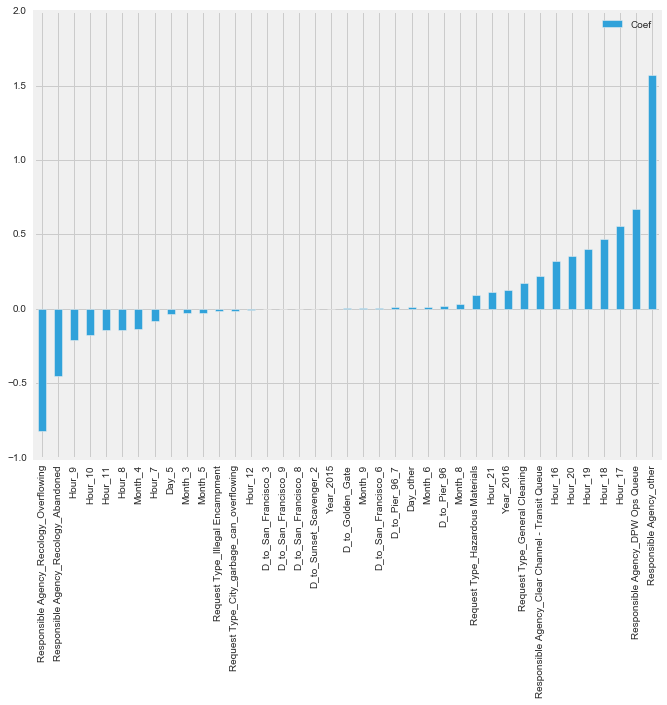

In [99]:
# show some major factors under Lasso model
# negative coefficient -> shorter response time

LS_coef = pd.DataFrame(LassoMd.coef_, columns=['Coef'],
                          index=X_cat.columns.tolist()+Recology_distance.columns.tolist()+cross_distance.columns.tolist())

fig, ax = plt.subplots(figsize=(10,8))
LS_coef[LS_coef['Coef'].abs() > 0.000001].sort_values('Coef').plot(kind='bar',ax=ax)

In [101]:
# the interpretation is very intuitive:
# for overflowing/abandaned/encampment cases, the response time is shorter in general
# for hazardous materials, DPW case, or other miscellanous cases, the pending time is longer
# 311 reponse quicker in morning (8-11 am), much slower in evening (16-20, probably they are off!)

# distance and district matters but not that much as I expected before

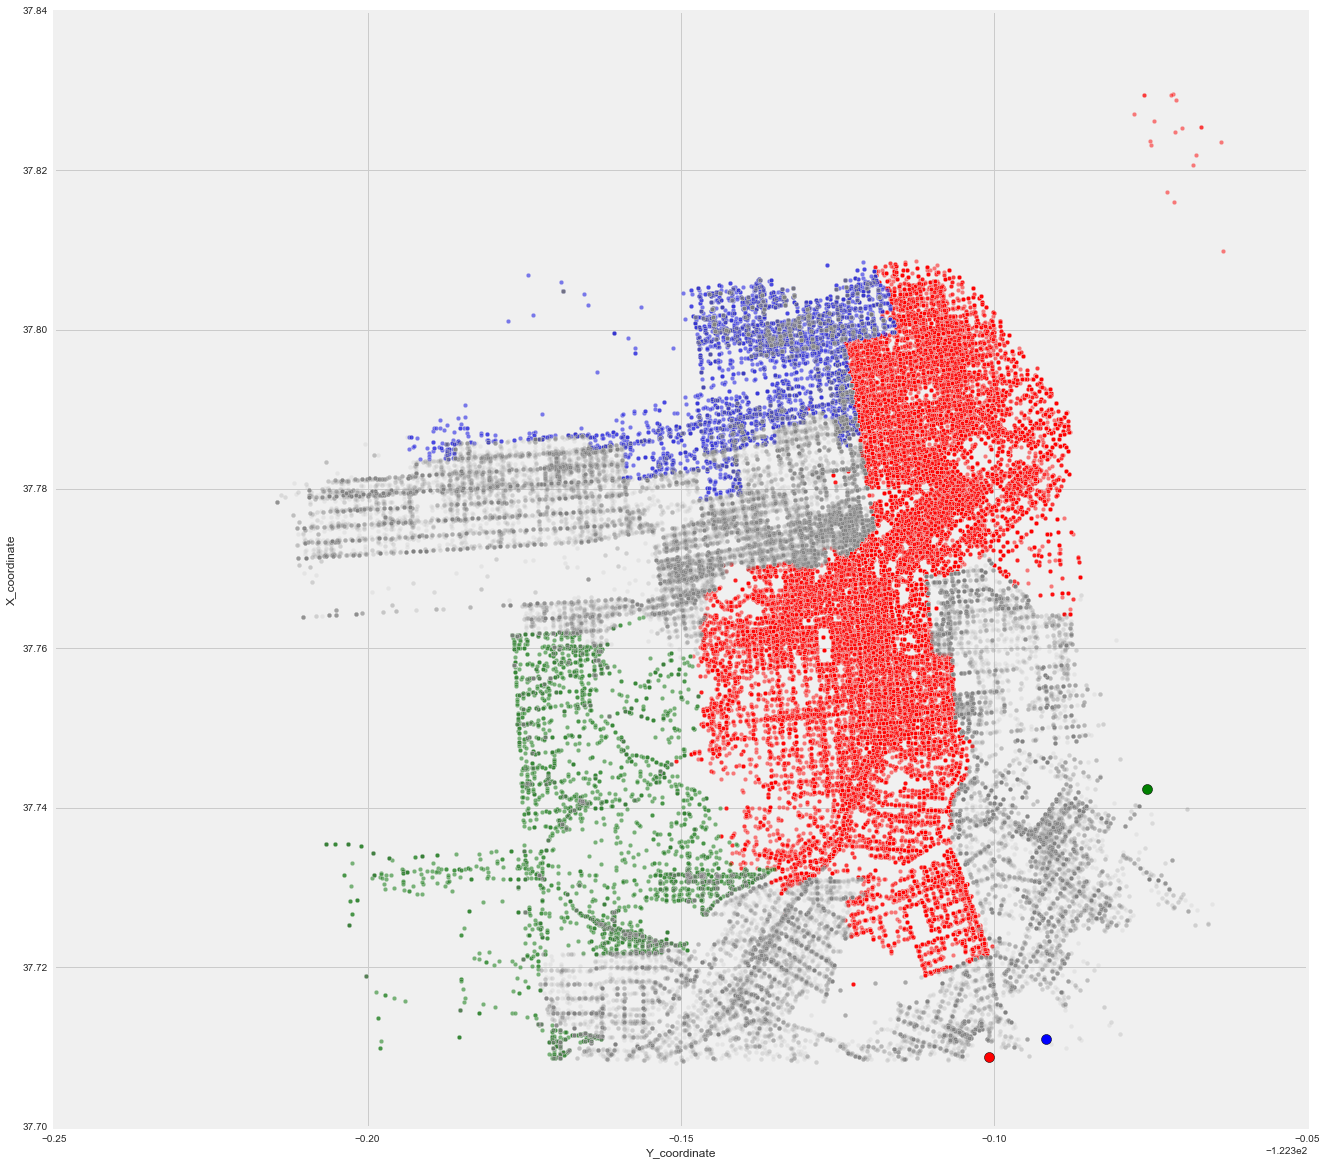

In [96]:
# though not very noticable, some cross effects exist between district and distance to Recology service station
# we plot it with the same color on map

Reco_SF = [3,9,8,6] # SF
Reco_SS = [2] # sunset
Reco_PR = [7] # pier 96
other_dist = [10, 5, 1, 11, 2, 7,]

ax =plt.gca()
for D in Reco_SF:
    clean_df[clean_df['Supervisor District'] == D].plot('Y_coordinate', 'X_coordinate', kind='scatter', figsize=(20,20), 
                                                 alpha=0.5, c='r', ax=ax)

for D in Reco_SS:
    clean_df[clean_df['Supervisor District'] == D].plot('Y_coordinate', 'X_coordinate', kind='scatter', figsize=(20,20), 
                                                 alpha=0.5, c='b', ax=ax)

for D in Reco_PR:
    clean_df[clean_df['Supervisor District'] == D].plot('Y_coordinate', 'X_coordinate', kind='scatter', figsize=(20,20), 
                                                 alpha=0.5, c='g', ax=ax)
    
for D in other_dist:
    clean_df[clean_df['Supervisor District'] == D].plot('Y_coordinate', 'X_coordinate', kind='scatter', figsize=(20,20), 
                                                 alpha=0.1, c='gray', ax=ax)
    
plt.scatter(Recology['San_Francisco'][1], Recology['San_Francisco'][0], s=100, facecolors='r', edgecolors='k')
plt.scatter(Recology['Sunset_Scavenger'][1], Recology['Sunset_Scavenger'][0], s=100, facecolors='b', edgecolors='k')
plt.scatter(Recology['Pier_96'][1], Recology['Pier_96'][0], s=100, facecolors='g', edgecolors='k')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
- How would you measure the success of such a program?
- Rephrase this question to be unbiased
- Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data that Ferris used in class: 
- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?